<a href="https://colab.research.google.com/github/farheentrisha/CNN-based-image-classification/blob/main/CNN_with_hyper_parameter_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
pip install keras_tuner

In [20]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters
import matplotlib.pyplot as plt

In [21]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [22]:
train_images = train_images/255.0
test_images= test_images/255.0

In [25]:
class_name=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

**defining a function to build the model**

In [26]:
from tensorflow import keras
from tensorflow.keras import layers, models

def build_model(hp):
    model = models.Sequential()

    model.add(layers.Conv2D(
        filters=hp.Int('conv1_units', min_value=32, max_value=128, step=16),
        kernel_size=(3, 3),
        activation='relu',
        input_shape=(32, 32, 3)
    ))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(
        filters=hp.Int('conv2_units', min_value=32, max_value=64, step=16),
        kernel_size=(3, 3),
        activation='relu'
    ))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(
        filters=hp.Int('conv3_units', min_value=32, max_value=64, step=16),
        kernel_size=(3, 3),
        activation='relu'
    ))

    model.add(layers.Flatten())
    model.add(layers.Dense(
        units=hp.Int('dense1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ))
    model.add(layers.Dropout(
        rate=hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1)
    ))
    model.add(layers.Dense(10, activation='softmax'))  # assuming classification into 10 classes
    optimizer = tf.keras.optimizers.Adam(
        learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    )

    model.compile(
        optimizer=optimizer,
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy']
    )
    return model


define tuner

In [27]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,  # ✅ corrected here
    directory='my_dir',
    project_name='cifar10_tuning'
)

tuner.search(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

model = tuner.hypermodel.build(best_hps)
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Trial 10 Complete [00h 06m 03s]
val_accuracy: 0.6225000023841858

Best val_accuracy So Far: 0.6424000263214111
Total elapsed time: 01h 49m 37s
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 114s 71ms/step - accuracy: 0.3116 - loss: 1.8490 - val_accuracy: 0.5021 - val_loss: 1.3731
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 135s 67ms/step - accuracy: 0.5045 - loss: 1.3734 - val_accuracy: 0.5705 - val_loss: 1.2053
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 147s 71ms/step - accuracy: 0.5673 - loss: 1.2192 - val_accuracy: 0.6031 - val_loss: 1.1160
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 104s 67ms/step - accuracy: 0.6096 - loss: 1.1103 - val_accuracy: 0.6357 - val_loss: 1.0162
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 68ms/step - accuracy: 0.6356 - loss: 1.0442 - val_accuracy: 0.6387 - val_loss: 1.0103
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 106s 68ms/step - accuracy: 0.6649 - loss: 0.9670 - val_accuracy: 0.6639 - val_loss: 0.9473
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 67ms/step - 

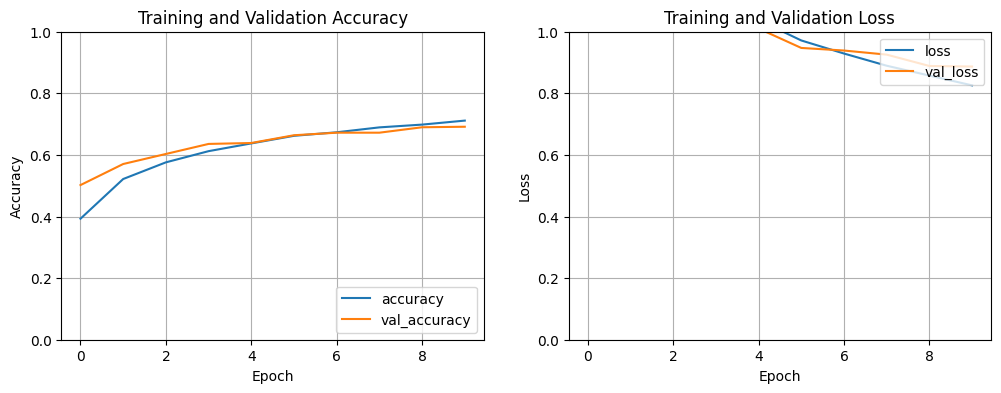

In [28]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid(True)


plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid(True)
plt.show()